In [1]:
import numpy as np
import pulser
from pulser.devices import DigitalAnalogDevice
from pulser.register import Register
from pulser.pulse import Pulse
from pulser.waveforms import BlackmanWaveform
import networkx as nx
import matplotlib.pyplot as plt

from pulser import Pulse, Sequence, Register
from pulser_simulation import QutipEmulator
from pulser.devices import DigitalAnalogDevice
from pulser.waveforms import InterpolatedWaveform
from scipy.optimize import minimize
from scipy.spatial.distance import pdist, squareform

from source.qubo import anneal, plot_distribution, draw_solutions

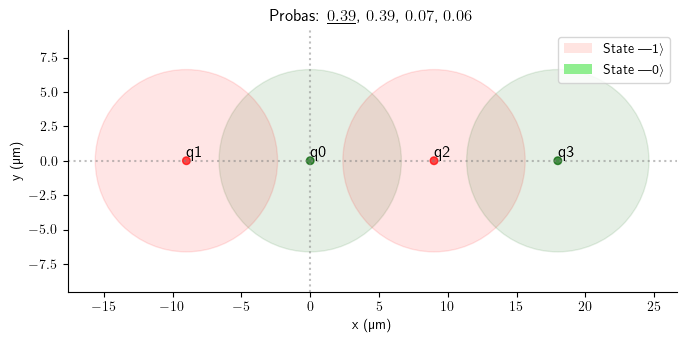

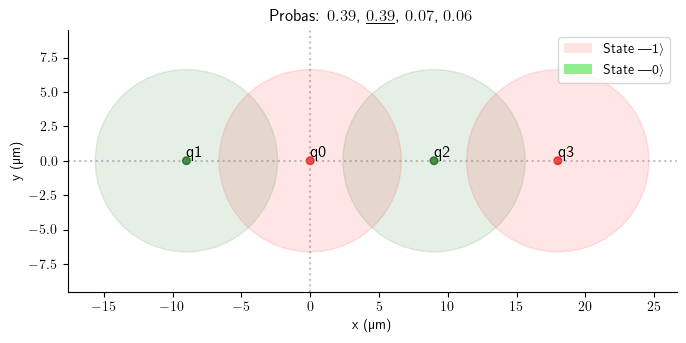

In [2]:
from matplotlib.patches import Patch
from matplotlib import rc

rc('text', usetex=True)

coords = [
    [-0, 0], 
    [-9, 0], 
    [9, 0],
    [18, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 2
delta_i = -1
T = 5000
counts:dict = anneal(reg, Omega, delta_i, draw=False, T=T) # dict of counts
draw_solutions(reg, counts, n=2)

In [ ]:
highest_counts

[('0110', 403), ('1001', 343)]

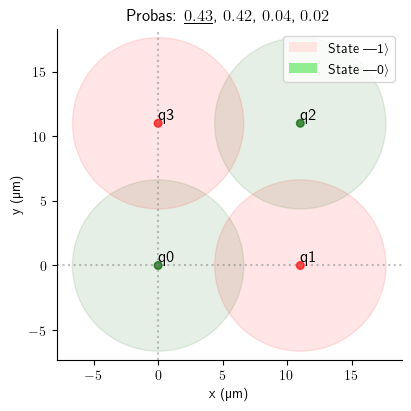

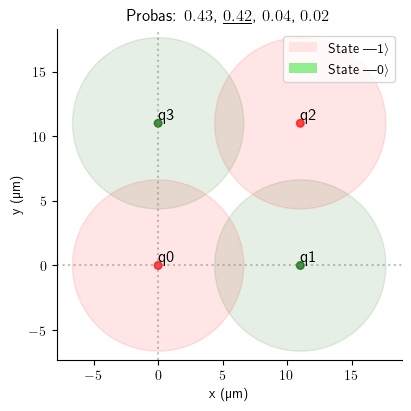

In [3]:
coords = [
    [-0, 0], 
    [11, 0], 
    [11, 11],
    [0, 11], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 5
delta_i = -1
T = 5000
counts = anneal(reg, Omega, delta_i, draw=False, T=T)
draw_solutions(reg, counts, n=2)

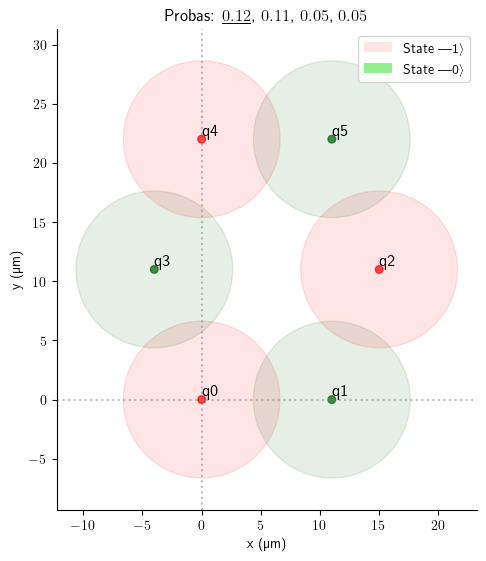

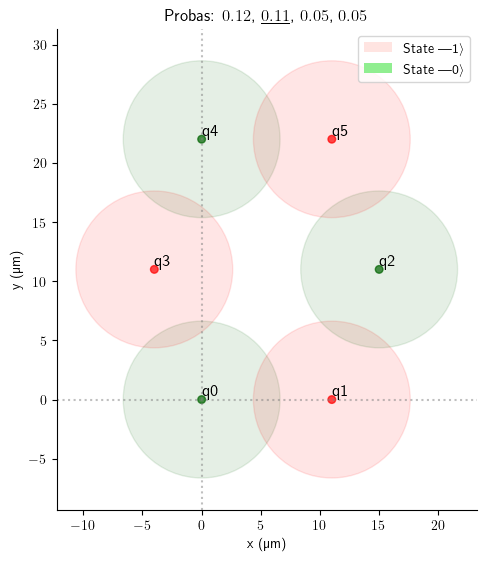

In [5]:
coords = [
    [-0, 0], 
    [11, 0], 
    [15, 11],
    [-4, 11], 
    [-0, 22], 
    [11, 22], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 5
delta_i = -1
T = 5000
counts = anneal(reg, Omega, delta_i, draw=False, T=T)
draw_solutions(reg, counts, n=2)

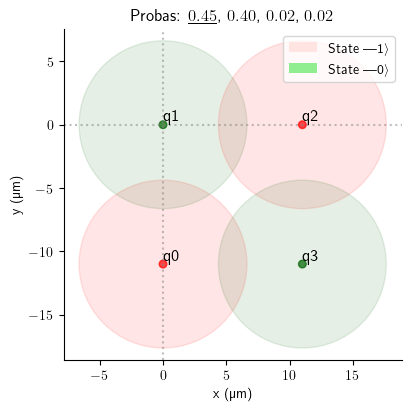

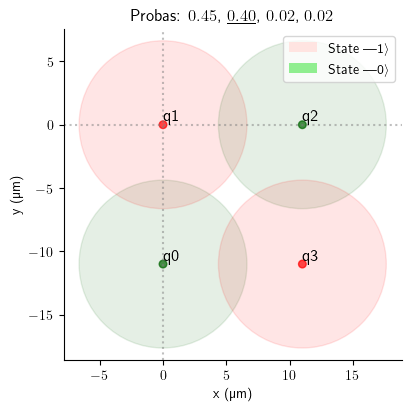

In [6]:
coords = [[-0, -11], [-0, 0], [11, 0], [11, -11]]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 5
delta_i = -1
T = 5000
counts = anneal(reg, Omega, delta_i, draw=False, T=T)
draw_solutions(reg, counts, n=2)